# 군집 - DBSCAN

Density-based spatial clustering of Application Noise

밀도 기반 데이터 클러스터링 알고리즘

클러스터의 개수를 미리 지정할 필요가 없다.

복잡한 형상의 데이터 셋에도 무리 없이 적용 가능

어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.

속도는 다소 느리다.

## #01. 패키지 참조

In [10]:
import seaborn as sb
from matplotlib import pyplot as plt

# 데이터샛 생성 함수
from sklearn.datasets import make_moons

# 클러스터 알고리즘 참조
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## #02. 데이터셋 생성

두 개의 반원 형태의 데이터 셋을 생성한다.

클러스터링 및 분류 알고리즘을 연습하기 위한 장난감 데이터 셋

> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [3]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=777)
print(type(x), type(y))
x.shape, y.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


((200, 2), (200,))

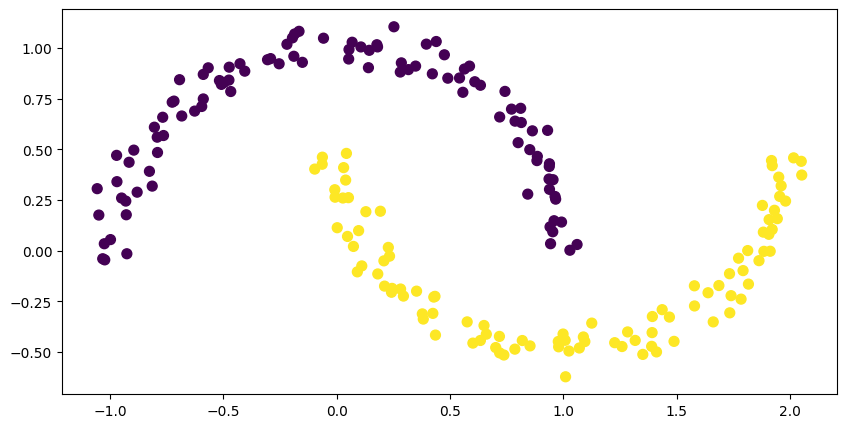

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(x=x[:, 0], y=x[:, 1], c=y, s=50, cmap='viridis')
plt.show()
plt.close()

## #03. 데이터 전처리

### 데이터 표준화

In [5]:
scaler = StandardScaler()
scaler.fit(x)
n_data = scaler.transform(x)
n_data[:5]

array([[ 1.64643132, -0.11522576],
       [ 1.4190732 , -1.13957776],
       [ 0.49959079,  0.19738492],
       [-1.4083806 ,  0.97549745],
       [ 0.27543691,  1.07244062]])

## #04. 클러스터링 모델 구현

### 모델 구축

In [8]:
dbscan = DBSCAN()
dbscan.fit(n_data)       # 학습
y_pred = dbscan.labels_  # 예측
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0], dtype=int64)

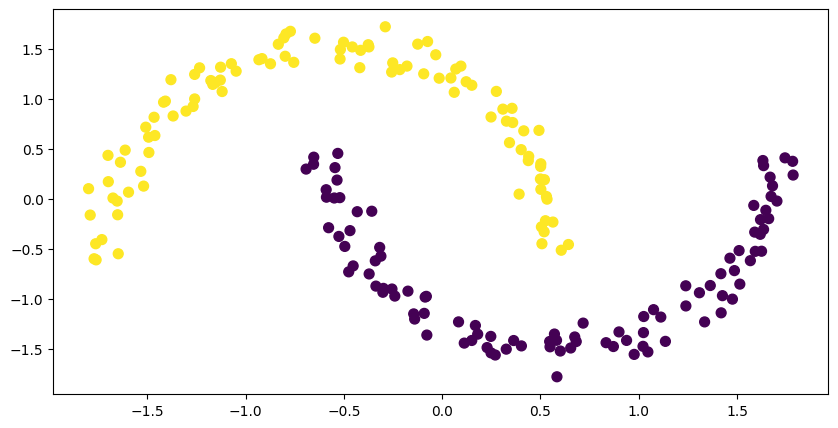

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(x=n_data[:, 0], y=n_data[:, 1], c=y_pred, s=50)
plt.show()
plt.close()

## #05. 실루엣 스코어 평가

In [11]:
silhouette_score(n_data, y_pred)

0.37722543978180895